In [26]:
# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Загрузка датасета с данными за 2019 г.

df = pd.read_csv("Datafiniti_Fast_Food_Restaurants_May19.csv")

### 1. Знакомство с данными

In [28]:
# Выведем датесет для проверки корректности загрузки

df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [29]:
df.shape

(10000, 16)

В датафрейме df - 10000 записей и 16 колонок. Данные представляют собой информацию о заведениях общественного питания в США.

In [30]:
print(df.info())
print('-------------------------------------------')
print('Названия столбцов в датафрейме: ', list(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [31]:
# Проверка на пропуски

df.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
sourceURLs            0
websites             82
dtype: int64

In [32]:
# Проверка на дубликаты

df[df.duplicated()].count()

id                   0
dateAdded            0
dateUpdated          0
address              0
categories           0
primaryCategories    0
city                 0
country              0
keys                 0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
sourceURLs           0
websites             0
dtype: int64

###### Вывод:
в загруженном датасете есть пропуски в столбце 'websites', дублирование данных отсутствует. Необходимо осуществить предобработку данных.

### 2. Предобработка данных

In [33]:
# Удалим из датасета столбцы, которые не интересны в рамках поставленной задачи.

df = df.drop(['id', 'keys', 'country','sourceURLs', 'websites'], axis=1)

In [34]:
df.head(3)

,dateAdded,dateUpdated,address,categories,primaryCategories,city,latitude,longitude,name,postalCode,province
0,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,40.39629,-104.69699,Carl's Jr.,80631,CO
1,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,39.08135,-108.58689,Del Taco,81505,CO
2,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,39.09148,-108.55411,Which Wich,81506,CO


In [35]:
df.shape

(10000, 11)

В обновленном датасете получилось 10000 строк и 11 колонок со следующей информацией:

1 столбец с названиями ресторанов: [name]

2 столбца с датами: [dateAdded, dateUpdated]

2 столбца с категориями ресторанов: [categories, primaryCategories]

6 колонок, относящиеся к локации ресторанов: [address, city, latitude, longtitude, postalCode, province]

In [36]:
# Посмотрим как в датасете обозначены провинции, чтобы в дальнейшем выбрать нужные нам в рамках кейса
df['province'].unique()

array(['CO', 'AR', 'AK', 'OR', 'NY', 'NE', 'AL', 'FL', 'MS', 'GA', 'OH',
       'IN', 'CA', 'AZ', 'IL', 'MI', 'KY', 'HI', 'TN', 'PA', 'SC', 'TX',
       'MD', 'VA', 'WA', 'DC', 'MO', 'WV', 'IA', 'NV', 'KS', 'ID', 'WI',
       'UT', 'NC', 'WY', 'OK', 'DE', 'MN', 'SD', 'NM', 'MT', 'ND', 'LA',
       'MA', 'CT', 'NJ'], dtype=object)

In [37]:
# Произведем фильтрацию по городам и провинциям, создадим датасет только с интересующими нас городами.

df_Columbus = df[(df['city'] == 'Columbus') & (df['province'] == 'OH')]
df_Cincinnati = df[(df['city'] == 'Cincinnati') & (df['province'] == 'OH')]
df_Cleveland = df[(df['city'] == 'Cleveland') & (df['province'] == 'OH')]
df_Las_Vegas = df[(df['city'] == 'Las Vegas') & (df['province'] == 'NV')]
df_Miami = df[(df['city'] == 'Miami') & (df['province'] == 'FL')]
df_Indianapolis = df[(df['city'] == 'Indianapolis') & (df['province'] == 'IN')]
df_Birmingham = df[(df['city'] == 'Birmingham') & (df['province'] == 'AL')]
df_Portland = df[(df['city'] == 'Portland') & (df['province'] == 'OR')]

df_main = pd.concat([df_Columbus, df_Cincinnati, df_Cleveland, df_Las_Vegas, df_Miami, df_Indianapolis, df_Birmingham, df_Portland])

##### Вывод: 
Из датасета с информацией по ресторанам США за 2019г. были удалены ряд столбцов и произведена фильтрация и отбор ресторанов по 8 городам из рассматриваемого списка.

### 3. Описание и анализ данных

In [38]:
# посмотреть на данные методом .info()

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 2119 to 9899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateAdded          514 non-null    object 
 1   dateUpdated        514 non-null    object 
 2   address            514 non-null    object 
 3   categories         514 non-null    object 
 4   primaryCategories  514 non-null    object 
 5   city               514 non-null    object 
 6   latitude           514 non-null    float64
 7   longitude          514 non-null    float64
 8   name               514 non-null    object 
 9   postalCode         514 non-null    object 
 10  province           514 non-null    object 
dtypes: float64(2), object(9)
memory usage: 48.2+ KB


В новом датасете 514 строк, 11 колонок. Данные представлены в полном объеме, без пропусков. Тип данных - float64 и object.

In [39]:
# Выведем количество ресторанов по городам:

df_city_count = df_main.groupby(['city']).count()
df_city_count['name']

city
Birmingham      68
Cincinnati      60
Cleveland       50
Columbus        90
Indianapolis    94
Las Vegas       54
Miami           46
Portland        52
Name: name, dtype: int64

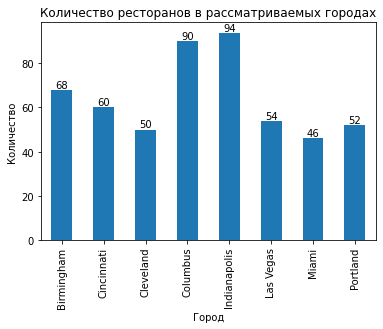

In [64]:
# Построим график с количеством ресторанов по каждому городу

name_count = df_city_count['name'].plot.bar(title='Количество ресторанов в рассматриваемых городах')
name_count.set_xlabel('Город',size=10)
name_count.set_ylabel('Количество',size=10)
for i, count in enumerate(df_city_count['name']):
    name_count.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

Мы видим, что по количеству ресторанов лидируют Indianapolis и Columbus.

##### Рассчитаем плотность расположения ресторанов по городам

In [41]:
# Создадим фреймы с необходимой информацией для расчетов

cities = ["Columbus", "Cincinnati", "Cleveland", "Las Vegas", "Miami", "Indianapolis", "Birmingham", "Portland"]
population_2019 = {"Columbus": 899_908, "Cincinnati": 304_445, "Cleveland": 381_386,
                        "Las Vegas": 653_963, "Miami": 467_103, "Indianapolis": 875_694,
                        "Birmingham": 208_889, "Portland": 654_378}
city_square = {"Columbus": 586, "Cincinnati": 206.3, "Cleveland": 213.6,
                             "Las Vegas": 352, "Miami": 143.1, "Indianapolis": 953,
                             "Birmingham": 387.3, "Portland": 375.6}

In [42]:
# Создание списков для диаграмм

density_area_list = []
density_restaurants_list = []
density_population_list = []

# Рассчет плотности расположения ресторанов по городам
for city in cities:
    restaurants = df_main[(df_main['city'] == city)] # Получаем рестораны в конкретном городе
    count = len(restaurants) # Выводим количество ресторанов в городе
    area = city_square[city] # Площадь города в км^2
    city_population = population_2019[city] # Численность населения

    # Рассчет плотности по формулам
    density_area = count / area
    density_restaurants = (count / city_population) * 1000
    density_population = city_population / area

    # Добавляем рассчитанные значения в списки
    density_area_list.append(density_area)
    density_restaurants_list.append(density_restaurants)
    density_population_list.append(density_population)

Представим графически плотность ресторанов, потенциальную ёмкость рынка и плотность населения по городам

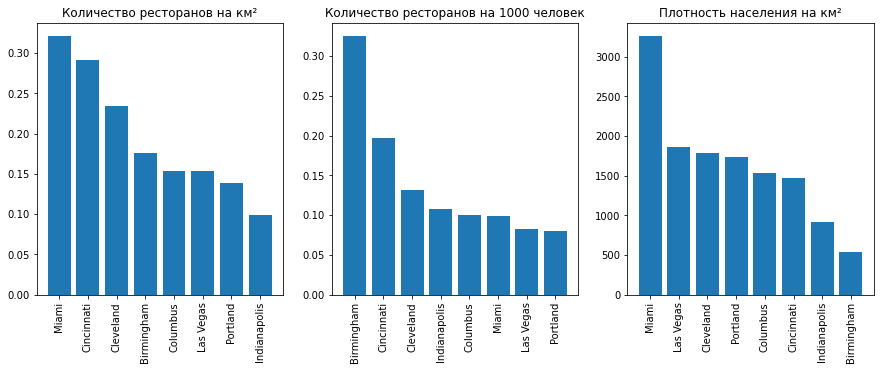

In [43]:
# Объединение списков в один список кортежей
plt_data = list(zip(cities, density_area_list, density_restaurants_list, density_population_list))
# Создание датафрейма
plt_df = pd.DataFrame(plt_data, columns=['City', 'Density Area', 'Density Restaurants', 'Density Population'])

# Сортировка столбцов по убыванию
sorted_area = plt_df.sort_values(by='Density Area', ascending=False)
sorted_restaurants = plt_df.sort_values(by='Density Restaurants', ascending=False)
sorted_population = plt_df.sort_values(by='Density Population', ascending=False)

# Вывод трех диаграмм
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].bar(sorted_area['City'], sorted_area['Density Area'])
axs[0].set_title('Количество ресторанов на км²')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(sorted_restaurants['City'], sorted_restaurants['Density Restaurants'])
axs[1].set_title('Количество ресторанов на 1000 человек')
axs[1].tick_params(axis='x', rotation=90)

axs[2].bar(sorted_population['City'], sorted_population['Density Population'])
axs[2].set_title('Плотность населения на км²')
axs[2].tick_params(axis='x', rotation=90)

Из графиков мы видим, что, например, Miami лидирует по количеству ресторанов на квадратный км и плотности населения, при этом количество ресторанов на количество проживающих жителей недостаточно. То есть рынок Майами перспективный для входа.

### 4. Выбор городов и районов для открытия ресторанов

#### 4.1. Произведем выбор городов по результатам юнит-экономики и плотности ресторанов

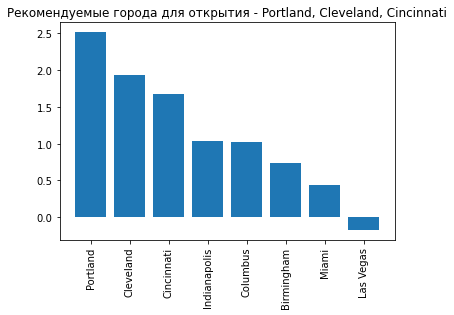

In [44]:
# Ранжирование городов по критериям: средняя прибыль на 1 заказ и плотность ресторанов с весом 0.5 каждый.

unit_economics = [1.90202730952381, 3.0678460952381, 3.62469897222222, -0.50237038095238, 0.545637511904761, 1.964543, 
                  1.28107396428571, 4.89655533333333] # Создаем список из значений юнит-экономики
df_choice_city = pd.DataFrame(list(zip(cities, unit_economics, density_area_list,)), 
                              columns=['City', 'Unit economics', 'Density Area',]) # Создаем датафрейм для рассчета баллов

df_choice_city["Final score"] = df_choice_city.apply(lambda row: (row["Unit economics"]*0.5) + (row["Density Area"]*0.5), 
                                                     axis=1) # Рассчитываем баллы
df_choice_city.sort_values(by = "Final score", inplace = True, ascending= False) # Сортировка от наибольшего балла к наименьшему

plt.bar(df_choice_city['City'], df_choice_city["Final score"]) # Строим график
plt.title('Рекомендуемые города для открытия - Portland, Cleveland, Cincinnati')
plt.tick_params(axis='x', rotation=90)

##### Вывод: 

предлагаем рассматривать все города для открытия российской сети фаст-фудов, но разделить на 3 этапа входа на рынок США.

1 этап: Portland, Cleveland, Cincinnati

2 этап: Indianapolis, Columbus, Birmingham

3 этап: Miami, Las Vegas.


##### Комментарии:

1 этап поможет зайти на рынок более удачно с концепцией, зарекомендовавшей себя на российском рынке.

В рамках 2 этапа нужно доработать незначительно концепцию, например, исключив несколько позиций из основного меню, добавив больше десертов.

В рамках 3 этапа нужно значительно изменить меню, поработать над новой концепцией. Но не стоит сразу исключать эти города из списка для открытия своих ресторанов, т.к. в рамках анализа мы увидили их перспективность.

#### 4.2. Анализ районов городов в рамках 1 этапа

Выбор районов осуществляется по ряду критериев: 

- плотность ресторанов по районам;
- потенциальная ёмкость рынка;
- доходность населения.

Наилучшими условиями для открытия кафе будет высокая плотность платежеспособного населения и, одновременно, наименьшее количество ресторанов, приходящихся на 1000 чел. при низкой конкуренции.

Определим приоритетность районов для открытия ресторанов

In [45]:
# Функция для нахождения количества ресторанов в каждом районе

def restaurants_count(name_city):
    data = pd.DataFrame(df_main[df_main['city'] == name_city].value_counts('postalCode')) # Находим количество ресторанов в каждом районе
    data.reset_index(inplace=True) # Изменяем индекс
    data.rename(columns = {0:'Count restaurants'}, inplace=True) # Изменяем название колонки
    return data

In [46]:
# Функция для расчета оценок районов 

def calculation_score(file_name, data_count):
    data = pd.read_csv(file_name) # Загружаем файл с отобранной информацией о медианном доходе, площади в ми² и численности населения, в разрезе районов города
    data['postalCode'] = data['postalCode'].astype('str') # Меняем тип данных по столбцу postalCode

    data = pd.merge(data, data_count, on = 'postalCode', how = 'left') # Добовляем информацию о количестве ресторан

    data["Density Area"] = data.apply(lambda row: row["Count restaurants"]/row["Area"], axis=1) # Расчет плотности ресторанов на ми²
    data["Passability"] = data.apply(lambda row: row["Population"]/row["Count restaurants"], axis=1) # Расчет условной ёмкости рынка
    data["Final score"] = data.apply(lambda row: (row["medianIncome"]*0.4) + (row["Passability"]*0.25) + (row["Density Area"]*0.35), 
                                                         axis=1) # Рассчитываем баллы по каждому району
    data.sort_values(by = "Final score", inplace = True, ascending= False) # Сортировка от наибольшего балла к наименьшему
    return data

In [47]:
# Отбор районов в Portland
count_Portland = restaurants_count('Portland') # Запускаем функцию restaurants_count
count_Portland['postalCode'][22] = '97239' # Изменияем значение postalCode

Portland_score = calculation_score('Portland.csv', count_Portland) # Запускаем функцию calculation_score


# Отбор районов в Cleveland
count_Cleveland = restaurants_count('Cleveland') # Запускаем функцию restaurants_count
count_Cleveland.drop(index=13, inplace=True) # Удаляем район 44195 

Cleveland_score = calculation_score('Cleveland.csv', count_Cleveland) # Запускаем функцию calculation_score


# Отбор районов в Cincinnati
count_Cincinnati = restaurants_count('Cincinnati') # Запускаем функцию restaurants_count
count_Cincinnati.drop(index=20, inplace=True) # Удаляем район 45219-1309 

Cincinnati_score = calculation_score('Cincinnati.csv', count_Cincinnati) # Запускаем функцию calculation_score

<ipython-input-47-2f44c6b9166f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_Portland['postalCode'][22] = '97239' # Изменияем значение postalCode


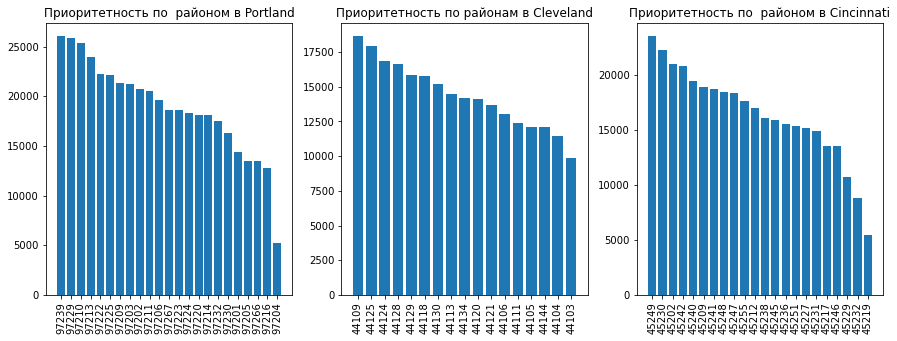

In [48]:
# Вывод трех диаграмм
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].bar(Portland_score['postalCode'], Portland_score["Final score"])
axs[0].set_title('Приоритетность по  районом в Portland')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(Cleveland_score['postalCode'], Cleveland_score["Final score"])
axs[1].set_title('Приоритетность по районам в Cleveland')
axs[1].tick_params(axis='x', rotation=90)

axs[2].bar(Cincinnati_score['postalCode'], Cincinnati_score["Final score"])
axs[2].set_title('Приоритетность по  районом в Cincinnati')
axs[2].tick_params(axis='x', rotation=90)

##### Вывод

согласно нашим критериям отбора и проведеному анализу рекомендовано в тестовом варианте открыть рестораны в следующих районах (представлены postalcode):

1) для Portland: 97239, 97229, 97210;

2) для Cleveland: 44109, 44124, 44128, 44129;

3) для Cincinnati: 45249, 45230, 45202, 45242